In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
df = pd.read_csv("mi_data.csv")
df.head()

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po


In [3]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_names   548 non-null    object 
 1   ratings       548 non-null    float64
 2   price         548 non-null    object 
 3   imgURL        548 non-null    object 
 4   storage_ram   548 non-null    object 
 5   os_processor  548 non-null    object 
 6   network       548 non-null    object 
 7   battery       548 non-null    object 
dtypes: float64(1), object(7)
memory usage: 34.4+ KB


,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
count,548,548.000000,548,548,548,548,548,548
unique,392,NaN,202,311,115,130,117,65
top,"REDMI Note 11T 5G (Stardust White, 128 GB)",NaN,"₹16,999",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBMemory Card Slot T...,Operating SystemAndroid 12Processor TypeMediat...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity5000 mAh
freq,6,NaN,23,7,47,17,36,157
mean,NaN,4.222810,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.264281,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Perbaiki kolom price (karena ada simbol ₹ dan koma):

In [5]:
df['price'] = df['price'].str.replace("₹","").str.replace(",","").astype(int)

In [6]:
#Normalisasi teks kolom battery, storage_ram, os_processor, network:

In [7]:
df['battery'] = df['battery'].str.extract(r'(\d+)').astype(float)
df['storage_ram'] = df['storage_ram'].str.replace("\s+", " ", regex=True)
df['os_processor'] = df['os_processor'].str.replace("\s+", " ", regex=True)
df['network'] = df['network'].str.replace("\s+", " ", regex=True)

In [8]:
df[['storage','ram']] = df['storage_ram'].str.extract(r'(\d+)\s*GB.*?(\d+)\s*GB')
df['storage'] = df['storage'].astype(float)
df['ram'] = df['ram'].astype(float)

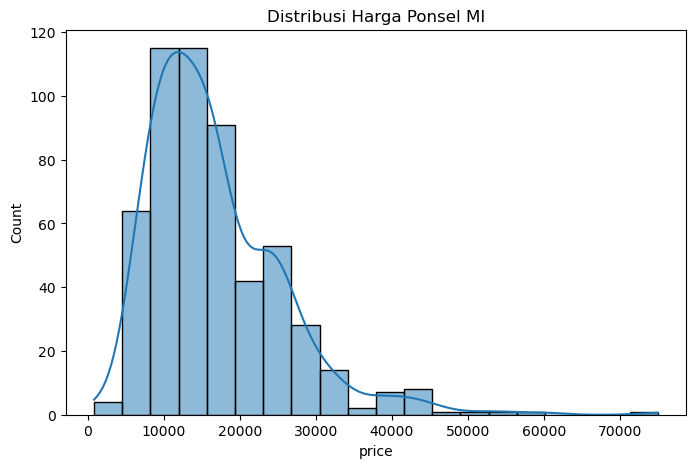

In [10]:
#Distribusi harga:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribusi Harga Ponsel MI")
plt.show()

In [11]:
# Rating vs Harga:

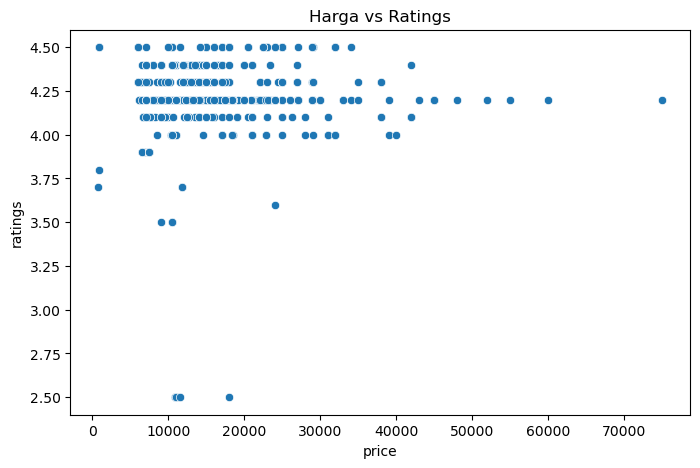

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['price'], y=df['ratings'])
plt.title("Harga vs Ratings")
plt.show()

<Axes: xlabel='battery', ylabel='price'>

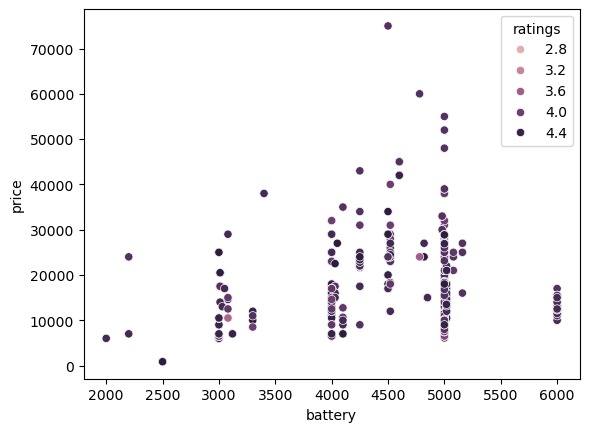

In [13]:
#Baterai vs Harga:
sns.scatterplot(x=df['battery'], y=df['price'], hue=df['ratings'])

In [15]:
df['features'] = df['storage_ram'] + " " + df['os_processor'] + " " + df['network'] + " Battery " + df['battery'].astype(str)

In [17]:
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df['features'])

In [19]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [2]:
def recommend_phone(phone_name, top_n=5):
    if phone_name not in df['model_names'].values:
        return "Phone not found in dataset."
    
    idx = df[df['model_names'] == phone_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # skip dirinya sendiri
    
    phone_indices = [i[0] for i in sim_scores]
    return df.iloc[phone_indices][['model_names', 'price', 'ratings']]


In [22]:
recommend_phone("REDMI 10 Power (Sporty Orange, 128 GB)", top_n=3)

,model_names,price,ratings
1,"REDMI 10 Power (Power Black, 128 GB)",12840,4.2
336,"REDMI A2+ (Sea Green, 64 GB)",8377,4.2
337,"REDMI A2+ (Classic Black, 64 GB)",8288,4.2
